# Basic Scraping.

Using the NFL's stat page.

In [ ]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl
cmap = cm.gnuplot



In [3]:
# imports for scraping

from bs4 import BeautifulSoup
import requests
import operator



In [4]:
teamcodes = [u'MIN', u'MIA', u'CAR', u'ATL', u'DET', \
             u'CIN', u'NYJ', u'DEN', u'BAL', u'NYG', \
             u'TEN', u'LA', u'DAL', u'NE', u'SEA',   \
             u'CHI', u'PIT', u'JAX', u'OAK', u'TB',  \
             u'HOU', u'GB', u'WAS', u'KC', u'PHI',   \
             u'BUF', u'NO', u'CLE', u'LAC', u'IND',  \
             u'ARI', u'SF']

In [5]:
r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&d-447263-p=1&statisticPositionCategory=RUNNING_BACK&qualified=true')


                  
#                  http://www.nfl.com/stats/categorystats?archive=false&conference=null&statisticPositionCategory=RUNNING_BACK&season=2017&seasonType=REG&experience=&tabSeq=1&qualified=true&Submit=Go')

#http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&d-447263-p=2&conference=null&statisticPositionCategory=RUNNING_BACK&qualified=true
    
    # standard league
#https://www.fantasypros.com/nfl/rankings/consensus-cheatsheets.php

# [u'Rank\r\n\r\n', u'Player (Team)', u'Pos', u'Bye', \
#         0              1              2       3
#     u'Best', u'Worst', u'Avg', u'Std Dev', u'ADP', u'vs. ADP', u'Notes']
#        4          5      6        7           8         9        10


CarryDict = {}


r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&d-447263-p=1&statisticPositionCategory=RUNNING_BACK&qualified=true')


data = r.text

soup = BeautifulSoup(data)

tables = soup.findAll('table')

for indx,table in enumerate(tables): 
    
    print indx,[th.get_text() for th in table.find("tr").find_all("th")]
        
    for row in table.find_all("tr")[1:]:
            sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]
            
            #print sav[2]
            
            try:
                CarryDict[sav[2]][sav[1]] = float(sav[4])
                
            except:
                CarryDict[sav[2]] = {}
                CarryDict[sav[2]][sav[1]] = float(sav[4])
   


r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&d-447263-p=2&statisticPositionCategory=RUNNING_BACK&qualified=true')


data = r.text

soup = BeautifulSoup(data)

tables = soup.findAll('table')

for indx,table in enumerate(tables): 
    
    print indx,[th.get_text() for th in table.find("tr").find_all("th")]
        
    for row in table.find_all("tr")[1:]:
            sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]
            
            #print sav[2]
            
            try:
                CarryDict[sav[2]][sav[1]] = float(sav[4])
                
            except:
                CarryDict[sav[2]] = {}
                CarryDict[sav[2]][sav[1]] = float(sav[4])
   



0 [u'Rk', u'Player', u'Team', u'Pos', u'\nAtt', u'\nAtt/G', u'\nYds', u'\nAvg', u'\nYds/G', u'\nTD', u'\nLng', u'\n1st', u'\n1st%', u'\n20+', u'\n40+', u'\nFUM']
0 [u'Rk', u'Player', u'Team', u'Pos', u'\nAtt', u'\nAtt/G', u'\nYds', u'\nAvg', u'\nYds/G', u'\nTD', u'\nLng', u'\n1st', u'\n1st%', u'\n20+', u'\n40+', u'\nFUM']


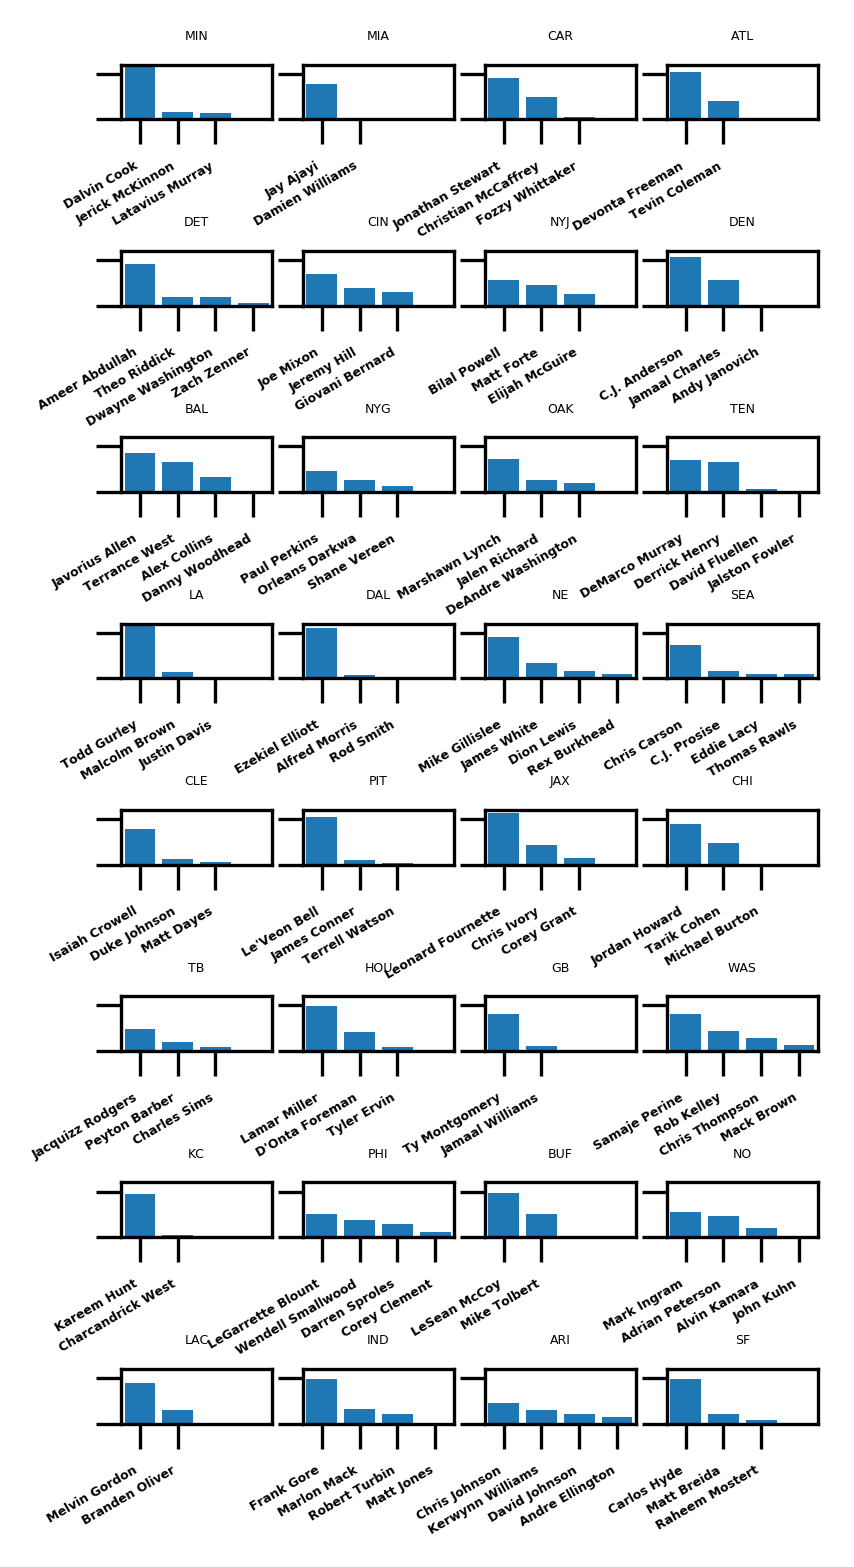

In [41]:
# all the running backs by carry

fig = plt.figure(figsize=(3,6))


for indx,team in enumerate(CarryDict.keys()):
    
    ax = fig.add_subplot(8,4,indx+1)
    
    use_order = (-1.*np.array(CarryDict[team].values())).argsort()
    
    ax.bar(np.arange(len(CarryDict[team].values())),np.array(CarryDict[team].values())[use_order])
    
    ax.set_xticks(np.arange(len(CarryDict[team].values())))
    ax.set_xticklabels(np.array(CarryDict[team].keys())[use_order],size=3)
    
    
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment("right")
    
    ax.set_yticklabels(())
    ax.axis([-0.5,3.5,0,60])
    #print team,CarryDict[team].values()
    ax.set_title(str(team),size=3)
    
    
plt.subplots_adjust(hspace=2.4)
#fig.tight_layout()

### Discussion points

#### Volume Matters
#### Order in touches matters
#### Quality of defense matters

In [30]:
# Look at the RECEIVING categories

#[u'Rk', u'Player', u'Team', u'Pos', u'\nRec', u'\nYds', \
#    u'\nAvg', u'\nYds/G', u'\nLng', u'\nTD', u'\n20+', u'\n40+', u'\n1st', u'\n1st%', u'\nFUM']
#   0        1         2        3       4         5
#       6         7           8          9       10         11       12        13          14


PlayerDict = {}

PlayerDict['Rec'] = {}
PlayerDict['TDs'] = {}
PlayerDict['Yds'] = {}


def grab_page(npage):

    r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=0&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&statisticCategory=RECEIVING&d-447263-p='+str(npage)+'&qualified=true')

    data = r.text


    soup = BeautifulSoup(data)

    tables = soup.findAll('table')

    for indx,table in enumerate(tables): 

        #print indx,[th.get_text() for th in table.find("tr").find_all("th")]

        for row in table.find_all("tr")[1:]:
                sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]

                #print sav[2]

                try:
                    PlayerDict['Rec'][sav[2]][sav[1]] = float(sav[4])
                    PlayerDict['TDs'][sav[2]][sav[1]] = float(sav[9])
                    PlayerDict['Yds'][sav[2]][sav[1]] = float(sav[5])



                except:
                    PlayerDict['Rec'][sav[2]] = {}
                    PlayerDict['Rec'][sav[2]][sav[1]] = float(sav[4])
                    
                    PlayerDict['TDs'][sav[2]] = {}
                    PlayerDict['TDs'][sav[2]][sav[1]] = float(sav[9])
                    
                    PlayerDict['Yds'][sav[2]] = {}
                    PlayerDict['Yds'][sav[2]][sav[1]] = float(sav[5])



for x in range(1,10):
    
    print x
    
    try:
        grab_page(x)        
    except:
        break
                    

1
2
3
4
5
6
7
8


In [31]:
print PlayerDict['Rec'].keys()

[u'MIN', u'MIA', u'CAR', u'ATL', u'DET', u'CIN', u'NYJ', u'DEN', u'BAL', u'NYG', u'OAK', u'TEN', u'NO', u'DAL', u'NE', u'SEA', u'CLE', u'BUF', u'JAX', u'CHI', u'TB', u'HOU', u'GB', u'WAS', u'KC', u'PHI', u'PIT', u'LA', u'LAC', u'IND', u'ARI', u'SF']


In [32]:
# Identify Players with a certain number of carries

for team in PlayerDict['Rec'].keys():
    
    for player in PlayerDict['Rec'][team].keys():
        
        if PlayerDict['Rec'][team][player] > 8:
            print team,player,PlayerDict['Rec'][team][player]

MIN Adam Thielen 19.0
MIN Dalvin Cook 10.0
MIN Stefon Diggs 17.0
MIA DeVante Parker 12.0
MIA Jarvis Landry 19.0
CAR Devin Funchess 10.0
CAR Christian McCaffrey 18.0
CAR Kelvin Benjamin 9.0
ATL Tevin Coleman 9.0
ATL Julio Jones 16.0
ATL Mohamed Sanu 15.0
ATL Taylor Gabriel 10.0
DET Theo Riddick 13.0
DET Eric Ebron 9.0
DET Golden Tate 21.0
CIN A.J. Green 20.0
NYJ Jermaine Kearse 14.0
NYJ Robby Anderson 9.0
DEN Emmanuel Sanders 16.0
DEN Demaryius Thomas 17.0
BAL Benjamin Watson 11.0
BAL Javorius Allen 10.0
NYG Evan Engram 13.0
NYG Sterling Shepard 16.0
NYG Brandon Marshall 10.0
NYG Shane Vereen 14.0
NYG Odell Beckham 13.0
OAK DeAndre Washington 10.0
OAK Jared Cook 13.0
OAK Michael Crabtree 13.0
OAK Amari Cooper 10.0
TEN Eric Decker 10.0
TEN Delanie Walker 15.0
TEN Rishard Matthews 14.0
NO Michael Thomas 17.0
NO Mark Ingram 11.0
NO Alvin Kamara 10.0
NO Ted Ginn 9.0
NO Coby Fleener 9.0
DAL Ezekiel Elliott 12.0
DAL Jason Witten 18.0
DAL Dez Bryant 11.0
DAL Terrance Williams 13.0
NE Chris Hog

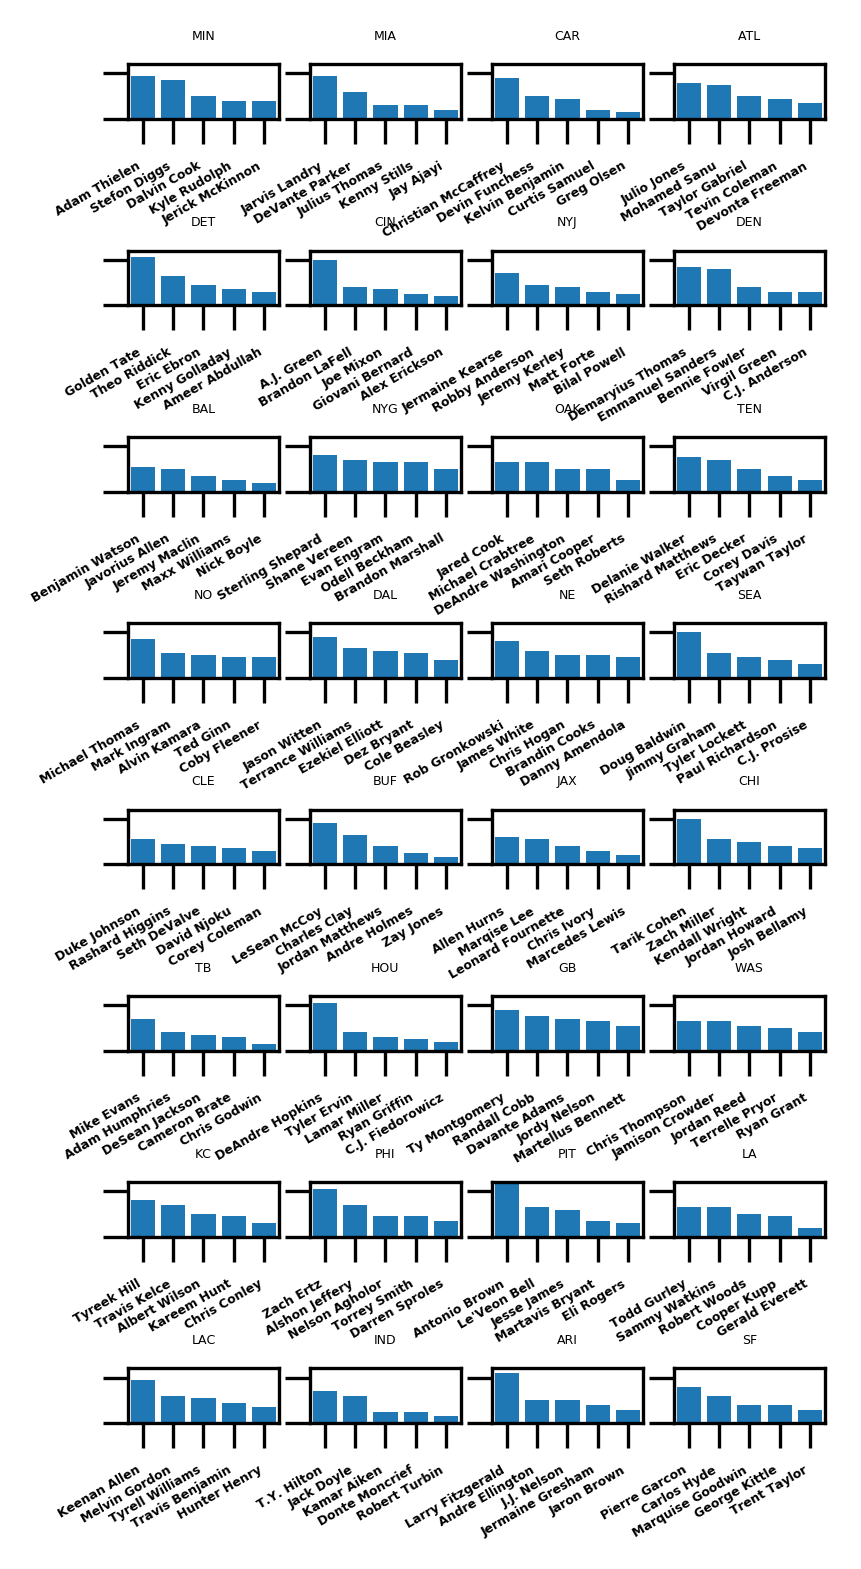

In [40]:
# all the running backs by carry

fig = plt.figure(figsize=(3,6))


for indx,team in enumerate(PlayerDict['Rec'].keys()):
    
    ax = fig.add_subplot(8,4,indx+1)
    
    use_order = (-1.*np.array(PlayerDict['Rec'][team].values())).argsort()
    
    ax.bar(np.arange(len(PlayerDict['Rec'][team].values())),np.array(PlayerDict['Rec'][team].values())[use_order])
    
    ax.set_xticks(np.arange(len(PlayerDict['Rec'][team].values())))
    ax.set_xticklabels(np.array(PlayerDict['Rec'][team].keys())[use_order],size=3)
    
    
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment("right")
    
    ax.set_yticklabels(())
    ax.axis([-0.5,4.5,0,24])
    #print team,CarryDict[team].values()
    ax.set_title(str(team),size=3)
    
    
plt.subplots_adjust(hspace=2.4)
#fig.tight_layout()

In [16]:
npage = 1

r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=0&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&statisticCategory=RECEIVING&d-447263-p='+str(npage)+'&qualified=true')


http://www.nfl.com/stats/categorystats?tabSeq=0&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&statisticCategory=RUSHING&d-447263-p=1&qualified=true

data = r.text


soup = BeautifulSoup(data)

tables = soup.findAll('table')

for indx,table in enumerate(tables): 

        print indx,[th.get_text() for th in table.find("tr").find_all("th")]
        
        for row in table.find_all("tr")[1:]:
                sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]

                print sav[2]

0 [u'Rk', u'Player', u'Team', u'Pos', u'\nRec', u'\nYds', u'\nAvg', u'\nYds/G', u'\nLng', u'\nTD', u'\n20+', u'\n40+', u'\n1st', u'\n1st%', u'\nFUM']
DAL
PIT
CHI
SF
GB
LAC
HOU
DET
MIN
PHI
LA
KC
MIA
LA
OAK
LAC
SF
NYG
GB
KC
NYJ
BUF
WAS
ATL
DEN
TEN
NE
SEA
IND
CIN
PIT
PHI
CHI
GB
ARI
NO
DAL
LA
CHI
DAL
OAK
OAK
MIN
DAL
ARI
JAX
NO
ATL
LA
CAR
